<a href="https://colab.research.google.com/github/vieduy/CS114.K21/blob/master/round_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import các thư viện cần dùng**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# **Xử lý dữ liệu**
# - Đọc file .csv
# - Visualize 5 sample đầu tiên


In [11]:
# preparing data
# generate more data 
time_df = pd.read_csv('data.csv', names=["size", "time"])
size = time_df['size'].astype(float)

column_names = ['size', 'time']
pr_df = time_df.reindex(columns=column_names)

data = pr_df[['size']].values
labels = pr_df['time'].values
print(pr_df.head(5))

      size      time
0  6083695  0.521842
1  1954367  0.152648
2  3734185  0.298548
3  5839301  0.460480
4  6343427  0.527977


# **Chia tập dữ liệu thành hai phần training set và test set**

In [12]:
# split train-test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

# visualize 5 sample của test set
print(X_test[:5])

[[2661626]
 [7548278]
 [2316651]
 [1977028]
 [6337478]]


# **Chọn model Linear Regression cho bài toán và training model**


In [13]:
# choose model Linearn Regression
lire = LinearRegression()

# training model...
lire.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Dùng model để dự đoán test set**

In [14]:
# Predict time
y_pred = lire.predict(X_test)

# print weight and bias
print('weight: ', lire.coef_)
print('bias: ',lire.intercept_)

weight:  [8.45606811e-08]
bias:  -0.015924338304915187


# **Mean Square Error và R2 error**

In [17]:
# Print test error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00


# **Visualize dữ liệu**

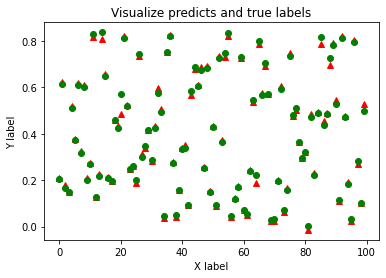

In [18]:
# Visualize pred vs true-labels
plt.plot(np.arange(0, 100), y_pred[:100], 'r^', np.arange(0, 100), y_test[:100], 'go')
plt.title('Visualize predicts and true labels')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()